In [3]:
import json
import mmcv
import pickle
from scipy import stats
from glob import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [202]:
table = {
    "metric": [
        "test_avg_per_class_acc",
        "test_camera_interaction",
        "test_climbing_down",
        "test_climbing_up",
        "test_hanging",
        "test_running",
        "test_sitting",
        "test_sitting_on_back",
        "test_standing",
        "test_top1_acc",
        "test_walking",
    ],
    "i3d": [
        0.42147,
        0.0,
        0.0,
        0.55,
        0.77419,
        0.0,
        0.85663,
        0.0,
        0.69508,
        0.79293,
        0.91736,
    ],
    "mvit": [
        0.40453,
        0.2963,
        0.125,
        0.4,
        0.03226,
        0.0,
        0.90143,
        0.28571,
        0.66288,
        0.78315,
        0.93719,
    ],
    "r50": [
        0.55174,
        0.44444,
        0.75,
        0.35,
        0.1129,
        0.0,
        0.91219,
        0.85714,
        0.68939,
        0.77446,
        0.84959,
    ],
    "x3d": [
        0.50347,
        0.11111,
        0.25,
        0.5,
        0.1129,
        0.0,
        0.8405,
        1.0,
        0.83902,
        0.8,
        0.87769,
    ],
    "timesformer": [
        0.45052,
        0.37037,
        0.5,
        0.4,
        0.09677,
        0.04,
        0.93728,
        0.14289,
        0.73106,
        0.78533,
        0.83636,
    ],
}

In [203]:
samples = {
    "test_sitting": 3686,
    "test_walking": 2639,
    "test_standing": 1754,
    "test_hanging": 434,
    "test_climbing_up": 188,
    "test_sitting_on_back": 115,
    "test_running": 88,
    "test_camera_interaction": 70,
    "test_climbing_down": 58,
}

# Create dataframe from samples with keys and values as columns
samples_df = pd.DataFrame.from_dict(samples, orient="index", columns=["samples"])
samples_df["metric"] = samples.keys()

In [204]:
df = pd.DataFrame(table)
df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x * 100)

In [205]:
df

,metric,i3d,mvit,r50,x3d,timesformer
0,test_avg_per_class_acc,42.147,40.453,55.174,50.347,45.052
1,test_camera_interaction,0.000,29.630,44.444,11.111,37.037
2,test_climbing_down,0.000,12.500,75.000,25.000,50.000
3,test_climbing_up,55.000,40.000,35.000,50.000,40.000
4,test_hanging,77.419,3.226,11.290,11.290,9.677
5,test_running,0.000,0.000,0.000,0.000,4.000
6,test_sitting,85.663,90.143,91.219,84.050,93.728
7,test_sitting_on_back,0.000,28.571,85.714,100.000,14.289
8,test_standing,69.508,66.288,68.939,83.902,73.106
9,test_top1_acc,79.293,78.315,77.446,80.000,78.533


In [206]:
df.drop([0, 9], inplace=True)

In [207]:
df = df.merge(samples_df, on="metric")
df["proportion"] = df.samples / df.samples.sum() * 100
df.sort_values(by="samples", inplace=True, ascending=False)

In [208]:
df["category"] = df.proportion.apply(lambda x: "head" if x > 10 else "tail")

In [209]:
df

,metric,i3d,mvit,r50,x3d,timesformer,samples,proportion,category
5,test_sitting,85.663,90.143,91.219,84.050,93.728,3686,40.810452,head
8,test_walking,91.736,93.719,84.959,87.769,83.636,2639,29.218335,head
7,test_standing,69.508,66.288,68.939,83.902,73.106,1754,19.419841,head
3,test_hanging,77.419,3.226,11.290,11.290,9.677,434,4.805137,tail
2,test_climbing_up,55.000,40.000,35.000,50.000,40.000,188,2.081488,tail
6,test_sitting_on_back,0.000,28.571,85.714,100.000,14.289,115,1.273251,tail
4,test_running,0.000,0.000,0.000,0.000,4.000,88,0.974314,tail
0,test_camera_interaction,0.000,29.630,44.444,11.111,37.037,70,0.775022,tail
1,test_climbing_down,0.000,12.500,75.000,25.000,50.000,58,0.642161,tail


In [212]:
for c in df.category.unique():
    cat_df = df[df.category == c]
    print(f"{cat_df[cat_df.columns[1:6]].mean()}")

i3d            82.302333
mvit           83.383333
r50            81.705667
x3d            85.240333
timesformer    83.490000
dtype: float64
i3d            22.069833
mvit           18.987833
r50            41.908000
x3d            32.900167
timesformer    25.833833
dtype: float64


<AxesSubplot:xlabel='metric'>

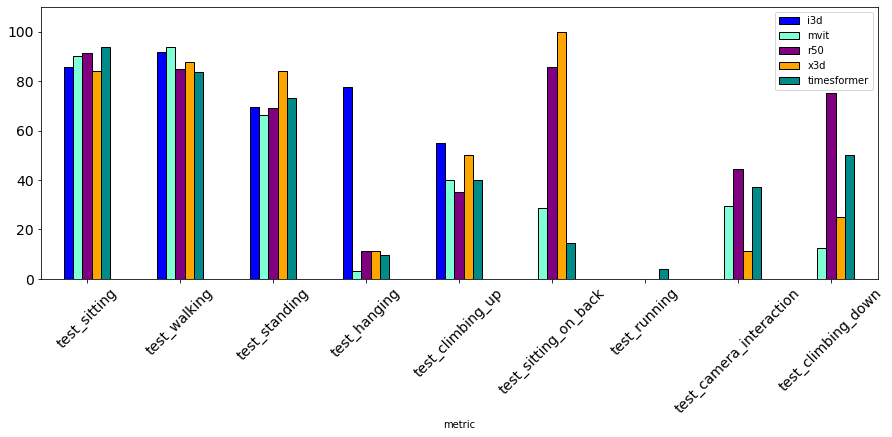

In [215]:
# Plot metric on the x-axis and accuracy on the left y-axis and samples on the right y-axis
colours = [plt.cm.tab20c.colors[i] for i in range(4)]
df.plot(
    x="metric",
    y=["i3d", "mvit", "r50", "x3d", "timesformer"],
    kind="bar",
    edgecolor="black",
    color=["blue", "aquamarine", "purple", "orange", "darkcyan"],
    figsize=(15, 5),
    ylim=(0, 110),
    rot=45,
    fontsize=14,
)

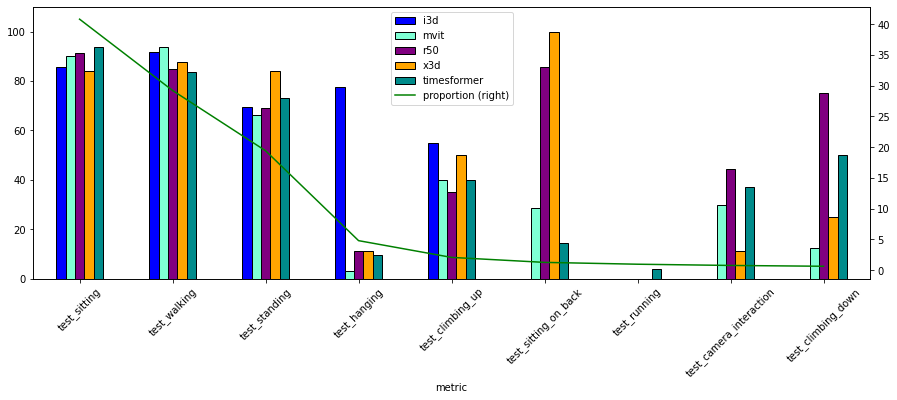

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

fig, ax = plt.subplots(figsize=(20, 10))

df.plot(
    x="metric",
    y=["i3d", "mvit", "r50", "x3d", "timesformer"],
    kind="bar",
    edgecolor="black",
    color=["blue", "aquamarine", "purple", "orange", "darkcyan"],
    figsize=(15, 5),
    ylim=(0, 110),
    rot=45,
    ax=ax,
)

df.plot(x="metric", y="proportion", ax=ax, secondary_y=True, rot=45, color="green")
plt.savefig("p500_per_class_performance.pdf", dpi=300, bbox_inches="tight")

#### **PanAf20k**

In [51]:
p20k_results = {
    "results": {
        "aggression": "22.21",
        "bipedal": "11.78",
        "camera_reaction": "52.31",
        "chimp_carrying": "62.84",
        "climbing": "73.58",
        "cross_species_interaction": "1.97",
        "display": "9.70",
        "feeding": "95.68",
        "grooming": "25.61",
        "no_behaviour": "90.42",
        "object_carrying": "29.72",
        "piloerection": "34.77",
        "resting": "71.65",
        "sex": "3.34",
        "social_interaction": "61.48",
        "tool_use": "84.65",
        "travel": "91.99",
        "vocalisation": "41.05",
    },
    "norm_results": {
        "aggression": "4.95",
        "bipedal": "23.05",
        "camera_reaction": "47.09",
        "chimp_carrying": "59.91",
        "climbing": "73.17",
        "cross_species_interaction": "3.83",
        "display": "5.24",
        "feeding": "96.09",
        "grooming": "22.87",
        "no_behaviour": "91.80",
        "object_carrying": "38.35",
        "piloerection": "16.35",
        "resting": "68.52",
        "sex": "2.76",
        "social_interaction": "57.25",
        "tool_use": "84.88",
        "travel": "92.88",
        "vocalisation": "40.07",
    },
    "samples": {
        "aggression": 176,
        "bipedal": 142,
        "camera_reaction": 2239,
        "chimp_carrying": 1906,
        "climbing": 2043,
        "cross_species_interaction": 115,
        "display": 219,
        "feeding": 6305,
        "grooming": 665,
        "no_behaviour": 4416,
        "object_carrying": 656,
        "playing": 1039,
        "piloerection": 51,
        "resting": 4304,
        "sex": 166,
        "social_interaction": 1955,
        "tool_use": 1153,
        "travel": 5224,
        "vocalisation": 1032,
    },
}

In [54]:
p20k_df = pd.DataFrame.from_dict(p20k_results, orient="index")
p20k_df = p20k_df.transpose()
p20k_df["results"] = p20k_df["results"].astype(float)
p20k_df["norm_results"] = p20k_df["norm_results"].astype(float)
p20k_df["proportion"] = p20k_df.samples / p20k_df.samples.sum() * 100
p20k_df.sort_values(by="proportion", ascending=False, inplace=True)

In [55]:
p20k_df.dropna(inplace=True)

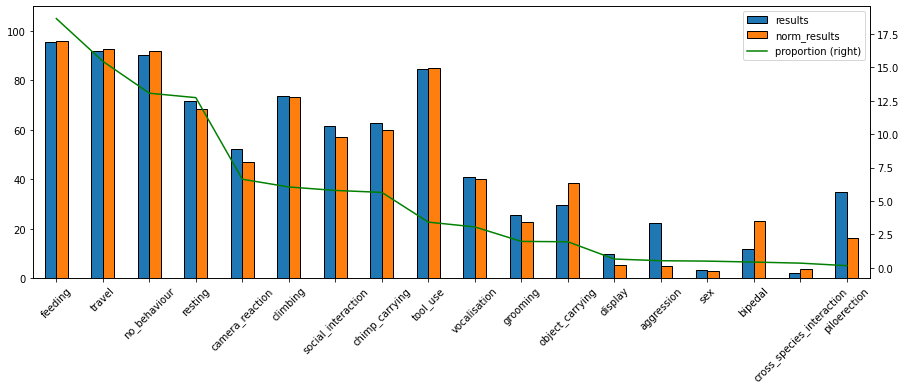

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

fig, ax = plt.subplots(figsize=(20, 10))

p20k_df.plot(
    y=["results", "norm_results"],
    kind="bar",
    edgecolor="black",
    figsize=(15, 5),
    ylim=(0, 110),
    rot=45,
    ax=ax,
)

p20k_df.plot(y="proportion", ax=ax, secondary_y=True, rot=45, color="green")
plt.savefig("p20k_per_class_performance.pdf", dpi=300, bbox_inches="tight")